基于RFM用户价值分群是数据化运营中常见的应用场景，它可以作为业务分析框架对付费用户从整体层面做价值判断。用户价值的划分包括基于规则的划分方法和基于聚类的划分方法，本文将会针对这两种方法分别进行分析。

# 数据准备

In [2]:

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## load data

In [3]:
# load data
df = pd.read_excel(io=r'Online Retail.xlsx')

In [4]:
# 显示前5行
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
# 有多少行多少列
df.shape

(541909, 8)

In [6]:
# 列出所有列名
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#每列有多少不同的类型
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
#检查有没有NaN值

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#列出每列不同值的统计

for column in df.columns:
    #if df[column].nunique() < 7043:  #换成7043
        print (column)
        print(df[column].value_counts())
        print ('____________________________')
        print ("                    ")

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
579777      687
581217      676
537434      675
580730      662
538071      652
580367      650
580115      645
581439      635
580983      629
578344      622
538349      620
578347      606
537638      601
537237      597
576617      593
536876      593
536592      592
537823      591
576837      585
579508      578
577078      572
537240      568
577358      561
576618      552
576840      544
           ... 
556300        1
556299        1
C561227       1
C572968       1
556289        1
C570291       1
556287        1
556286        1
556266        1
556262        1
556261        1
556260        1
556307        1
556308        1
556309        1
556310        1
556311        1
556312        1
556313        1
556314        1
556315        1
556316        1
556317        1
556320        1
556321        1
556322        1
556326        1
556328        1
C539949       1
C570647       1
Name: InvoiceN

## 从上面发现这是由好几个国家的用户数据构成的，但因为用户分群一般是在某一个国家内展开应用的，所以我们这里只提取人数最多的 united kindom。

In [11]:
df = df[df['Country'] == 'United Kingdom']

## 找到所有customerID 为NAN的行

In [12]:
customer_nan_df = df[df["CustomerID"].isnull()]
customer_nan_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


想验证一种可能性，因为每个InvoiceNo都会对应一个CustomerID，所以想找到CustomerID对应的InvoiceNo，然后InvoiceNo是否有对应的CustomerID，如果有的话，那么大概率可以填补到缺失的CustomerID。

In [13]:
invoice_for_customerid_nan_set = set()

for i in customer_nan_df['InvoiceNo']:
    invoice_for_customerid_nan_set.add(i)
    
for index, row in df.iterrows():
    if row['InvoiceNo'] in invoice_for_customerid_nan_set and pd.isnull(row['CustomerID']) == False:
        
        print (row['InvoiceNo'], row['CustomerID'])

没有任何return，看起来上面的可能性被排除了。所以对于缺失的CustomerID，只好采取删除的方式。

In [14]:
df = df[~(df["CustomerID"].isnull())]

删除Quantity为负数的值，产生的原因可能是退货等这些可能产生负数交易。当然不删除也可以，这个可以业务团队内部商量，注意退货单的时间不算在recency和frequency就好。

In [15]:
df = df[~(df["Quantity"]<0)]

最后 UnitPrice * Quantity 作为 Price 列。

In [16]:
df['Price'] = df["UnitPrice"] * df["Quantity"]

In [17]:
# Convert InvoiceDate from object to date format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [18]:
# Convert CustomerID from float to string format
df['CustomerID'] = df['CustomerID'] .astype(str).replace('\.0', '', regex=True)

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047,United Kingdom,54.08


In [20]:
df.shape

(354345, 9)

数据现在已经清洗准备好了，下面开始划分。

# 基于规则的划分方法

RFM 的划分规则有很多类，可以结合分析目的出发来制定划分规则。

比如，如果想给整体网站的用户进行打分，就可以直接采用RFM模型；但如果进行某类产品的推广，比如一款非常昂贵的商品，在寻找目标用户时，RFM的M可以不再是用户累加的消费，而可以改成商品均价来体现用户对价格的敏感程度，同时M的权重也会提高。

本文采取的分类方法里，RFM的权重比值为 1:1:1；每个指标分为高中低三档，高为前20%, 低为后20%，中为中间的60%。

In [21]:
from datetime import timedelta
import seaborn as sns
import squarify 

In [22]:
max_date = df['InvoiceDate'].max()
min_date = df['InvoiceDate'].min()
print ('max_date:', max_date, '    ', 'min_date:', min_date)

max_date: 2011-12-09      min_date: 2010-12-01


我们假设今天为 max_date 的第二天，即2011-12-10.

In [23]:
refrence_date = max_date + pd.to_timedelta(1, unit='d')
refrence_date

datetime.date(2011, 12, 10)

每次购买距离今天有多少天。

In [24]:
df['days_since_last_purchase'] = refrence_date - df.InvoiceDate

In [25]:
df['days_since_last_purchase']  = df['days_since_last_purchase'].dt.days

创建一个新的dataframe,只含有 customerid和RFM。

In [26]:
# Grouping by CustomerID
group_df = df.groupby(['CustomerID']).agg({
        'days_since_last_purchase': 'min',
        'InvoiceNo': 'count',
        'Price': 'sum'}).reset_index()

group_df.rename(columns={'days_since_last_purchase': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Price': 'Monetary'}, inplace=True)

In [27]:
group_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4596,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


In [28]:
group_df.describe([0.2,0.4,0.6,0.8])

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,92.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,1.000000,1.000000,0.000000
20%,13.000000,13.000000,241.620000
40%,33.000000,29.000000,465.550000
50%,51.000000,41.000000,651.820000
60%,72.000000,58.000000,897.620000
80%,179.000000,120.000000,1957.320000
max,374.000000,7847.000000,259657.300000


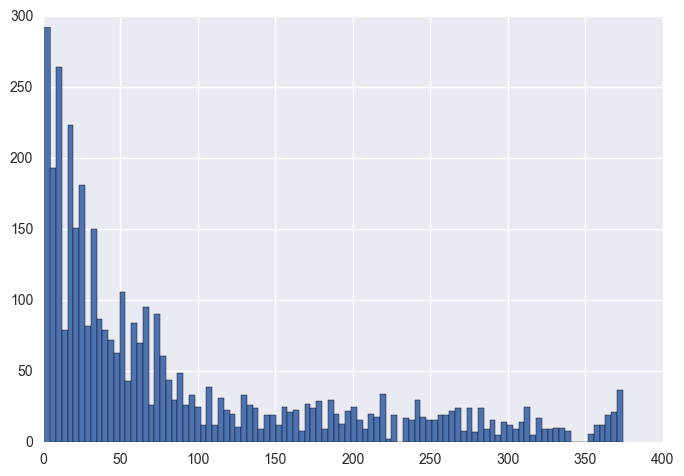

In [29]:
plt.hist(group_df['Recency'], 100)
plt.xlim(0,400)

plt.show()

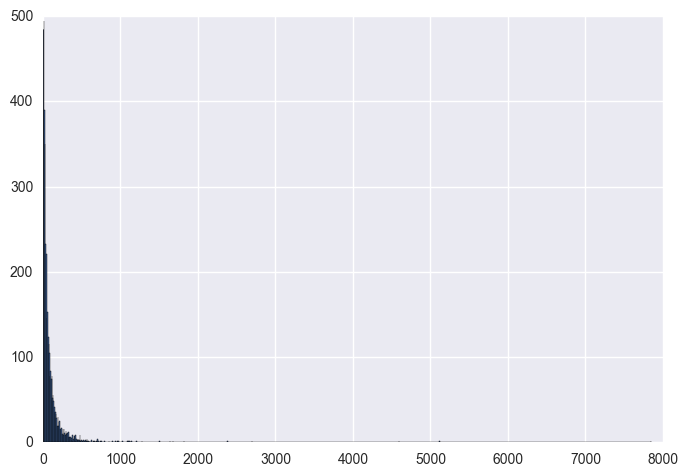

In [30]:
plt.hist(group_df['Frequency'],1000)
plt.xlim(0,8000)

plt.show()

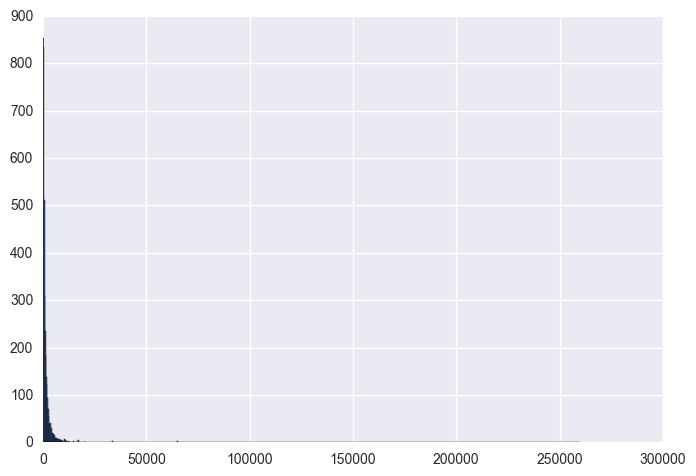

In [31]:
plt.hist(group_df['Monetary'],1000)

plt.show()

对RFM进行分组。

In [32]:
def modify_to_three (a_list):
    for index, item in enumerate(a_list):
        if item == 2 or item == 4:
            a_list[index] = 3  

In [33]:
#对 R 分组

r_labels = [5,4,3,2,1]

r_groups = pd.qcut(group_df['Recency'], q=5, labels=r_labels)

modify_to_three (r_groups)

#对 F 分组

f_labels = [1,2,3,4,5]

f_groups = pd.qcut(group_df['Frequency'], q=5, labels=f_labels)

modify_to_three (f_groups)

#对 M 分组

m_labels = [1,2,3,4,5]

m_groups = pd.qcut(group_df['Monetary'], q=5, labels=m_labels)

modify_to_three (m_groups)

# Create new columns R and F 
group_df = group_df.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)


到目前为止，RFM每个维度都有3档，即高、中、低，这样子会导致我们会有3的3次方个组合可能性，即27种组合可能性。用户群体的过多会导致难以针对每个群体制定有效的营销方式，因为本文会采取把RFM三个维度相加，以维度和对用户进行分类。这里的assumption是RFM三个维度权重相同，在日后的分析里可以结合分析目的调整权重。

In [34]:
group_df['RFM_score'] = group_df[['R','F','M']].sum(axis=1) 

In [35]:
group_df['RFM_score'].value_counts()

9.0     1285
7.0      710
11.0     566
5.0      427
13.0     417
15.0     283
3.0      233
Name: RFM_score, dtype: int64

## 给每一个分数起个合适的名字来代表这类用户群的特性。

In [36]:
for i, row in group_df.iterrows():
    
    if row['RFM_score'] == 15.0:
        
        a = 'Champion'    # 最优冠军客户群
        
    if row['RFM_score'] == 13.0:
        
        a = 'High_Loyal'  # 高忠诚度客户群
        
    if row['RFM_score'] == 11.0:
        
        a = 'Potential_Loyal'   # 潜在高忠诚度客户群
    
    if row['RFM_score'] == 9.0:
        
        a = 'Promising'   # 潜力顾客群
        
    if row['RFM_score'] == 7.0:
        
        a = 'Needs_Attention'  # 重点关注客户群 
        
    if row['RFM_score'] == 5.0:
        
        a = 'At_Risk'  # 濒临流失客户群 
        
    if row['RFM_score'] == 3.0:
        
        a = 'Sleeping' # 沉睡客户群
        
    group_df.set_value(i,'Customer_Segmetation',a)
    
 
     

C:\Users\youfe\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [37]:
segm_percent = group_df['Customer_Segmetation'].value_counts(1)

In [38]:
group_df['Customer_Segmetation'].value_counts(1)

Promising          0.327723
Needs_Attention    0.181076
Potential_Loyal    0.144351
At_Risk            0.108901
High_Loyal         0.106350
Champion           0.072175
Sleeping           0.059424
Name: Customer_Segmetation, dtype: float64

画一个treemap来体现七种不同用户群的比例。

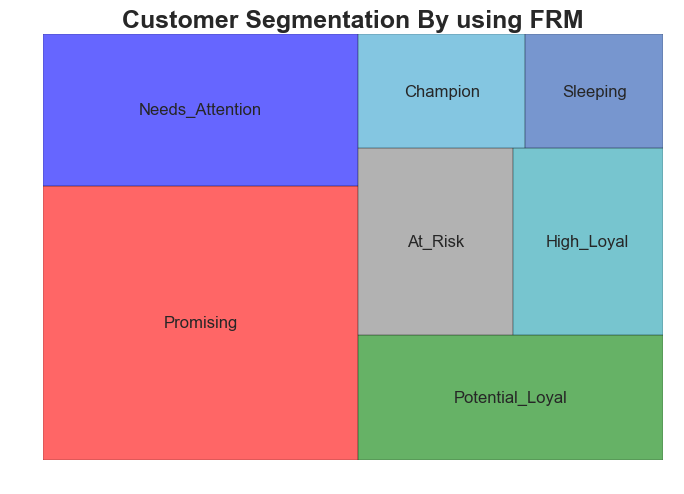

In [39]:
label=["Promising", "Needs_Attention", "Potential_Loyal", "At_Risk", "High_Loyal", "Champion", "Sleeping"]
color = ['red','blue','green','grey', '#1C9FB0','#32A0CE','#1C51B0']

squarify.plot(sizes=segm_percent, label=label, color = color, alpha=0.6 )
plt.axis('off')
plt.title("Customer Segmentation By using FRM",fontsize=18,fontweight="bold")
plt.show()

### 分组结合占比，得出以下用户群运营建议：

Promising 潜力顾客群 ：人数占比最多，约1/3，RFM三项都处于中间水平或某一项比较突出，多培养和树立品牌意识给他们，可邀请他们加入免费尝试活动

Needs Attention 重点关注客户群 ：有一定的活跃，粘性不高但人数占比不小，重点关注他们不要让他们濒临流失，可以专门给予优惠活动，让他们觉得被重视

Potentical Loyal 潜在高忠诚度客户群 ：对网站有一定粘性，可推荐一些和他们往日购买类型不太相同的商品来激发购买力，并尝试邀请他们加入能提高忠诚度的项目

At Risk 濒临流失客户群 ： 约占总人数10%，可考虑采取邮件推送途径并结合他们的购买记录，推送个性化的商品或网站爆品，可以给予尺度较大的优惠

High Loyal 高忠诚度客户群 ：对网站粘性较强，拥有很高的潜在价值，采取针对性营销手段吸引他们，鼓励他们写review和病毒营销

Champion 最优冠军客户群 ： 占比约为7.2%，交易频繁，交易量大，且最近一次交易时间间隔短，贡献价值极高，是最新产品推送的最佳客户群（成功率高，成本低）

Sleeping 沉睡客户群 ： 也可以理解为流失客户，可采取多样化且强有力的召回措施（注意措施成本的分配和控制）







In [40]:
group_df.head()

,CustomerID,Recency,Frequency,Monetary,F,M,R,RFM_score,Customer_Segmetation
0,12346,326,1,77183.60,1,5,1,7.0,Needs_Attention
1,12747,3,103,4196.01,3,5,5,13.0,High_Loyal
2,12748,1,4596,33719.73,5,5,5,15.0,Champion
3,12749,4,199,4090.88,5,5,5,15.0,Champion
4,12820,4,59,942.34,3,3,5,11.0,Potential_Loyal


# K-means clustering

K-means有3个重要Assumpitions:
    
    1. all variables have the same variance
    2. the variance of the distribution of each attribute (variable) is spherical
    3. the prior probability for all k clusters are the same, i.e. each cluster has roughly equal number of observations
 
 第三个条件确实是我们分类的假设，所以可以认为满足。所以我们接下来一一检查前2个assumptions。

##   1. all variables have the same variance

从前面的图像可以看出，Recency、Frequency 和 Monetary 三个变量的distribution并不相同、为了把他们转化成拥有相同的variance，决定把每个variable转化为standard normal ditributed，所以每个variable都符合 N(0,1)的分布。

第一步，先转化成normal。即log转化：

In [41]:
group_df['Recency_log'] = np.log(group_df['Recency'])
group_df['Frequency_log'] = np.log(group_df['Frequency'])

group_df['Monetary'] = group_df['Monetary'] + 0.0000000001
group_df['Monetary_log']  = np.log(group_df['Monetary'])

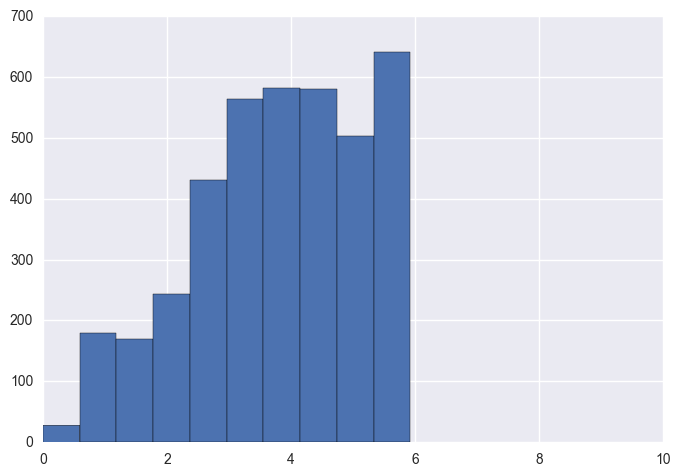

In [42]:
plt.hist(group_df['Recency_log'])
plt.xlim(0,10)

plt.show()

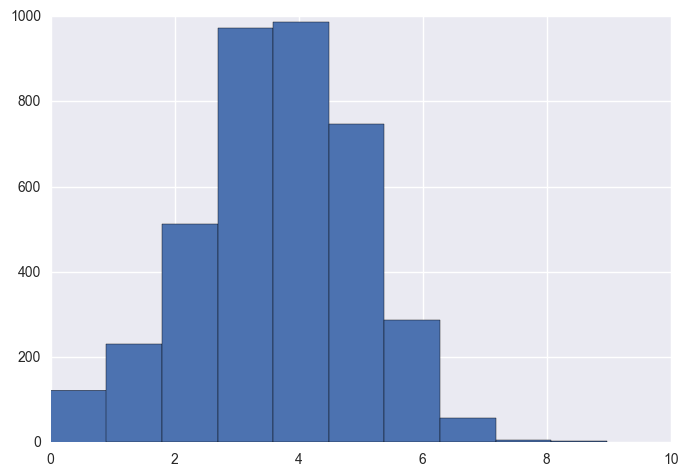

In [43]:
plt.hist(group_df['Frequency_log'])
plt.xlim(0,10)

plt.show()

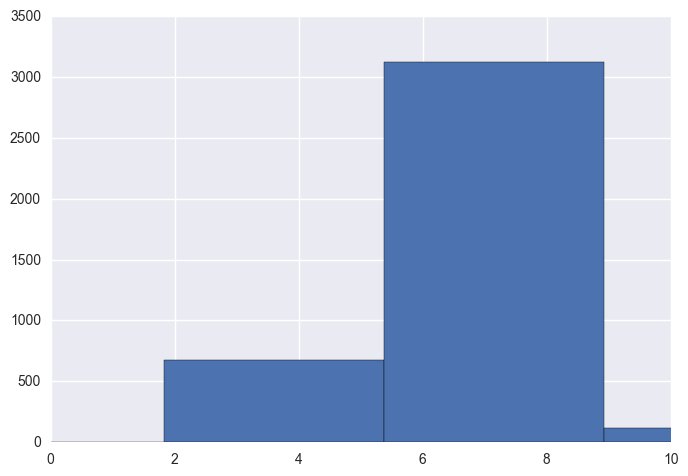

In [44]:
plt.hist(group_df['Monetary_log'])
plt.xlim(0,10)

plt.show()

第二步，采用SKLearn里的StandardScaler转化：

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(group_df[['Recency_log', 'Frequency_log', 'Monetary_log']])
data_stanard_norm = scaler.transform(group_df[['Recency_log', 'Frequency_log', 'Monetary_log']])
data_stanard_norm = pd.DataFrame(data_stanard_norm, columns = ['Recency_standard','Frequency_standard','Monetary_standard'])


## 2. the variance of the distribution of each attribute (variable) is spherical

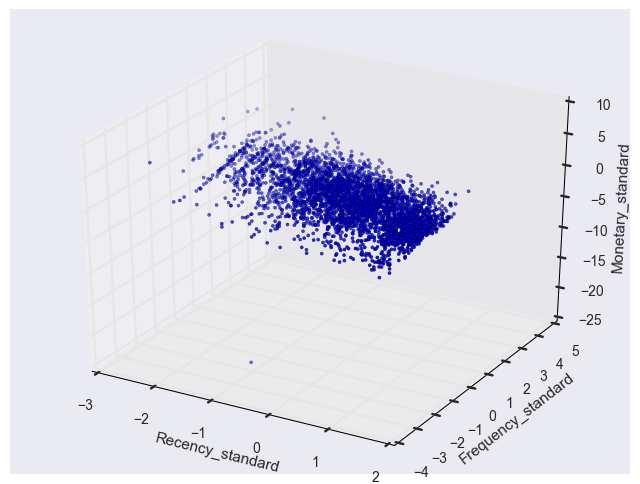

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs =data_stanard_norm.Recency_standard
ys = data_stanard_norm.Frequency_standard
zs = data_stanard_norm.Monetary_standard
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency_standard')
ax.set_ylabel('Frequency_standard')
ax.set_zlabel('Monetary_standard')

plt.show()

从上图可知满足“spherical”条件。

## 用Elbow图 +  Sum-of-Squared-Errors (SSE)寻找最佳K

In [47]:
from sklearn.cluster import KMeans

In [48]:
# Fit KMeans and calculate SSE for each *k*
k_list = []
sse_list = []

for k in range(1,8):
    k_list.append(k)
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_stanard_norm)
    sse_list.append(kmeans.inertia_)


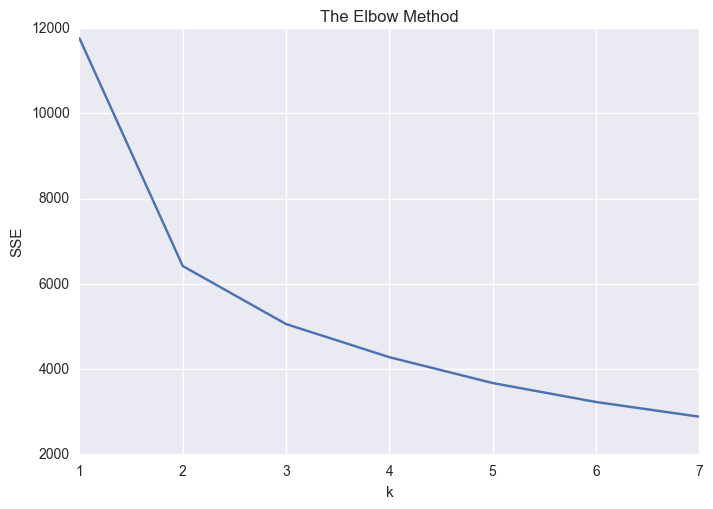

In [49]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
plt.plot(k_list,sse_list )

plt.show()

从上图可以得出当k= 4 时，SSE的急速下降就停止了，所以我们选k=4。

In [50]:
kmodel = KMeans(n_clusters = 4)
kmodel.fit(data_stanard_norm)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
# Assign k-means labels to cluster labels
cluster_labels = kmodel.labels_

# Assign cluster labels to original pre-transformed data set
data_stanard_norm = data_stanard_norm.assign(Cluster = cluster_labels)
group_df = group_df.assign(Cluster = cluster_labels)

In [52]:
# Group data set by k-means cluster
group_df.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(0)

,Monetary,Recency,Frequency
Cluster,,,
0,486.0,25.0,30.0
1,1490.0,90.0,84.0
2,6067.0,11.0,269.0
3,290.0,197.0,15.0


In [53]:
# Group data set by k-means cluster
group_df.groupby(['Cluster']).agg({
    'Recency': 'median',
    'Frequency': 'median',
    'Monetary': 'median'
}).round(0)

,Monetary,Recency,Frequency
Cluster,,,
0,384.0,22,26
1,1055.0,67,70
2,2815.0,9,179
3,234.0,198,12


In [54]:
# Group data set by k-means cluster
group_df.groupby(['Cluster']).agg({
    'Recency': 'count',
    'Frequency': 'count',
    'Monetary': 'count'
}).round(0)

,Monetary,Recency,Frequency
Cluster,,,
0,779,779,779
1,1193,1193,1193
2,794,794,794
3,1155,1155,1155


通过上图，我们可以得知4类用户群的特征：

Cluster 0: 占比最大，RFM三个维度都表现没有很好，但和表现最不活跃的Cluster 3来讲又稍微好些，看上去较长时间没有来我们网站购买过商品了，但之前的消费记录还算可以，所以可以尝试用各种营销手段刺激一下这批用户，是有可能再活跃起来的

cluster 1: 占比不算大， 近期有消费过我们的产品，消费能力比较普通，算粘性较高的客户；这类客户可能对价格敏感些，如有打折类活动可以大力推广给他们

cluster 2: 占比第二大，从累计消费和频次来看，使我们最理想的客户，但近期没有没有购买过商品，需要引起非常大的重视，尽快盘查清楚原因

cluster 3： 占比较少，但RFM三个维度表现都最不好，属于4个类型里最不活跃的群体，可以细分这批用户的行为路径找到较集中的流失点，同时也推荐一些爆品试试能不能召回

Limitations:
    
RFM没有设计到权重的分配。